In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94394bf23f6c48eee6235f6324791aa9


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | husavik
Processing Record 2 of Set 12 | abu zabad
Processing Record 3 of Set 12 | dikson
Processing Record 4 of Set 12 | albany
Processing Record 5 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 12 | bredasdorp
Processing Record 7 of Set 12 | la ronge
Processing Record 8 of Set 12 | jamestown
Processing Record 9 of Set 12 | busselton
Processing Record 10 of Set 12 | springfield
Processing Record 11 of Set 12 | krasnoselkup
Processing Record 12 of Set 12 | barrow
Processing Record 13 of Set 12 | ushuaia
Processing Record 14 of Set 12 | kautokeino
Processing Record 15 of Set 12 | avarua
Processing Record 16 of Set 12 | parabel
Processing Record 17 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 18 of Set 12 | cape town
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | najran
Processing Record 21 of Set 12 | uper

Processing Record 29 of Set 15 | mahebourg
Processing Record 30 of Set 15 | parrita
Processing Record 31 of Set 15 | kuanshan
City not found. Skipping...
Processing Record 32 of Set 15 | lebu
Processing Record 33 of Set 15 | new norfolk
Processing Record 34 of Set 15 | viru
Processing Record 35 of Set 15 | pisco
Processing Record 36 of Set 15 | anshun
Processing Record 37 of Set 15 | iralaya
Processing Record 38 of Set 15 | kalga
Processing Record 39 of Set 15 | montanha
Processing Record 40 of Set 15 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 15 | kailua
Processing Record 42 of Set 15 | saint-philippe
Processing Record 43 of Set 15 | kalinovskaya
Processing Record 44 of Set 15 | esperance
Processing Record 45 of Set 15 | bathurst
Processing Record 46 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 15 | black river
Processing Record 48 of Set 15 | kanadukathan
Processing Record 49 of Set 15 | trincomalee
Processing Record 50 of Set 1

City not found. Skipping...
Processing Record 15 of Set 19 | japura
Processing Record 16 of Set 19 | muros
Processing Record 17 of Set 19 | cabo san lucas
Processing Record 18 of Set 19 | orchard homes
Processing Record 19 of Set 19 | pueblo
Processing Record 20 of Set 19 | luderitz
Processing Record 21 of Set 19 | hirara
Processing Record 22 of Set 19 | nyagan
Processing Record 23 of Set 19 | vao
Processing Record 24 of Set 19 | clarence town
Processing Record 25 of Set 19 | lishui
Processing Record 26 of Set 19 | neuquen
Processing Record 27 of Set 19 | sulangan
Processing Record 28 of Set 19 | bakel
Processing Record 29 of Set 19 | asau
Processing Record 30 of Set 19 | dunedin
Processing Record 31 of Set 19 | bagdarin
Processing Record 32 of Set 19 | fort nelson
Processing Record 33 of Set 19 | margate
Processing Record 34 of Set 19 | kayes
Processing Record 35 of Set 19 | pedernales
Processing Record 36 of Set 19 | clinton
Processing Record 37 of Set 19 | pangai
Processing Record 3

Processing Record 2 of Set 23 | hokitika
Processing Record 3 of Set 23 | chicama
Processing Record 4 of Set 23 | mogadishu
Processing Record 5 of Set 23 | bathsheba
Processing Record 6 of Set 23 | ler
Processing Record 7 of Set 23 | riviere-au-renard
Processing Record 8 of Set 23 | curup
Processing Record 9 of Set 23 | deputatskiy
Processing Record 10 of Set 23 | hambantota
Processing Record 11 of Set 23 | noumea
Processing Record 12 of Set 23 | staryy krym
Processing Record 13 of Set 23 | ulaanbaatar
Processing Record 14 of Set 23 | adrasmon
Processing Record 15 of Set 23 | zhengjiatun
Processing Record 16 of Set 23 | tasbuget
City not found. Skipping...
Processing Record 17 of Set 23 | san isidro
Processing Record 18 of Set 23 | verkhnevilyuysk
Processing Record 19 of Set 23 | dutse
Processing Record 20 of Set 23 | araouane
Processing Record 21 of Set 23 | samarai
Processing Record 22 of Set 23 | tautira
Processing Record 23 of Set 23 | bacum
Processing Record 24 of Set 23 | lakes en

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Husavik,66.0449,-17.3389,49.59,91,100,2.46,IS,2022-08-19 00:41:43
1,Abu Zabad,12.3500,29.2500,72.79,88,100,11.12,SD,2022-08-19 00:41:43
2,Dikson,73.5069,80.5464,41.63,92,100,22.03,RU,2022-08-19 00:41:44
3,Albany,42.6001,-73.9662,72.01,64,95,6.06,US,2022-08-19 00:41:44
4,Bredasdorp,-34.5322,20.0403,52.29,87,100,7.45,ZA,2022-08-19 00:41:45
5,La Ronge,55.1001,-105.2842,79.02,44,20,3.44,CA,2022-08-19 00:41:45
6,Jamestown,42.0970,-79.2353,71.24,69,0,5.75,US,2022-08-19 00:38:21
7,Busselton,-33.6500,115.3333,58.19,77,100,8.50,AU,2022-08-19 00:41:46
8,Springfield,37.2153,-93.2982,78.87,65,0,3.44,US,2022-08-19 00:37:08
9,Krasnoselkup,65.7000,82.4667,47.25,70,0,14.36,RU,2022-08-19 00:41:47


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Husavik,IS,2022-08-19 00:41:43,66.0449,-17.3389,49.59,91,100,2.46
1,Abu Zabad,SD,2022-08-19 00:41:43,12.3500,29.2500,72.79,88,100,11.12
2,Dikson,RU,2022-08-19 00:41:44,73.5069,80.5464,41.63,92,100,22.03
3,Albany,US,2022-08-19 00:41:44,42.6001,-73.9662,72.01,64,95,6.06
4,Bredasdorp,ZA,2022-08-19 00:41:45,-34.5322,20.0403,52.29,87,100,7.45
5,La Ronge,CA,2022-08-19 00:41:45,55.1001,-105.2842,79.02,44,20,3.44
6,Jamestown,US,2022-08-19 00:38:21,42.0970,-79.2353,71.24,69,0,5.75
7,Busselton,AU,2022-08-19 00:41:46,-33.6500,115.3333,58.19,77,100,8.50
8,Springfield,US,2022-08-19 00:37:08,37.2153,-93.2982,78.87,65,0,3.44
9,Krasnoselkup,RU,2022-08-19 00:41:47,65.7000,82.4667,47.25,70,0,14.36


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1660870044.498687

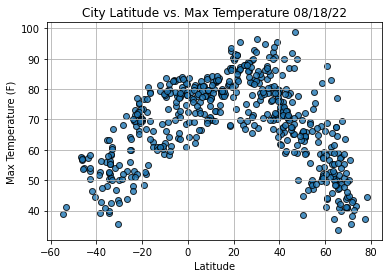

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

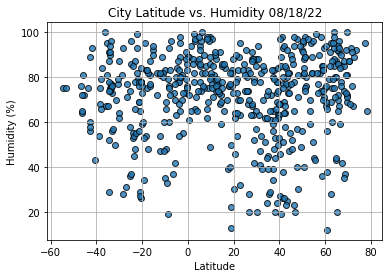

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

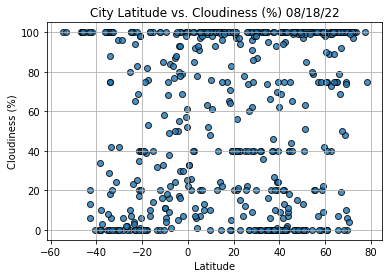

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

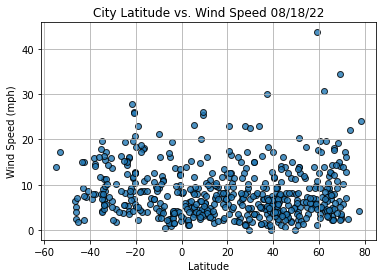

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()